# IBTrACS Data

The IBTrACS, or International Best Track Archive for Climate Stewardship (IBTrACS) data contains a history of tropical storm data. It is stored by [NOAA's National Climatic Data Center (NCDC)](https://www.ncdc.noaa.gov/ibtracs/). Let's load the data and explore it in Python.

## Import Modules Gg

Let's start by importing the modules we need.

In [1]:
from urllib import request
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Download the Data

Now we need to download the IBTrACS data. It isn't very large, so it shouldn't take too long.

In [2]:
# Set the basin to download
basin = 'NA'

# Set the URL
url = 'https://www.ncei.noaa.gov/data/'
url += 'international-best-track-archive-for-climate-stewardship-ibtracs/'
url += 'v04r00/access/csv/ibtracs.'+basin+'.list.v04r00.csv'

# Set the file path
filePath = '../data/ibtracs.'+basin+'.nc'

# Download the file if it doesn't already exists
if not os.path.exists(filePath):
    request.urlretrieve(url,filePath)

## Explore the Data

There are a lot of variables here, but we will only need a handful. Some of the pertinent variables and their descriptions are provided below (from the IBTrACS documentation):

<center>

Variable Name | Description
--- | ---
`numobs` | the number of observations for each storm
`sid` | a unique storm identifier (SID) assigned by IBTrACS algorithm
`season` | year the storm began
`number` | number of the storm for the year (restarts at 1 for each year)
`basin` | basin of the current storm position
`subbasin` | sub-basin of the current storm position
`name` | name of system give by source (if available)
`iso_time` | time of the observation in ISO format (YYYY-MM-DD hh:mm:ss)
`nature` | type of storm (a combination of the various types from the available sources)
`lat` | mean position - latitude (a combination of the available positions)
`lon` | mean position - longitude (a combination of the available positions)
`wmo_wind` | maximum sustained wind speed assigned by the responsible WMO agency
`wmo_pres` | minimum central pressure assigned by the responsible WMO agnecy
`track_type` | track type (main or spur). 
`dist2land` | current distance to land from current position
`landfall` | minimum distance to land over next 3 hours (=0 means landfall)
`iflag` | a flag identifying the type of interpolation used to fill the value at the given time
`storm_speed` | storm translation speed (knots)
`storm_dir` | storm translation direction (in degrees east of north)

</center>

We won't necessarily keep all of these, but it's good to know what these are. Now let's read in the data and have a look at the last few values.

In [3]:
# Read the data from the CSV
df = pd.read_csv(filePath,low_memory=False,skiprows=range(1,2))

# Only keep a handful of columns
keepColumns = ['SID','SEASON','NUMBER','NAME','ISO_TIME',
               'NATURE','LAT','LON','WMO_WIND','WMO_PRES','TRACK_TYPE',
               'DIST2LAND','LANDFALL','IFLAG','STORM_SPEED','STORM_DIR']
df = df[keepColumns]

# Convert time strings to datetimes for better querying
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df['SEASON'] = pd.to_numeric(df['SEASON'])
df['NUMBER'] = pd.to_numeric(df['NUMBER'])
df['LAT'] = pd.to_numeric(df['LAT'])
df['LON'] = pd.to_numeric(df['LON'])

# Show the last few records
df.tail()

,SID,SEASON,NUMBER,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,STORM_SPEED,STORM_DIR
125527,2022311N21293,2022,83,NICOLE,2022-11-11 06:00:00,TS,31.2667,-84.5333,,,PROVISIONAL,0,0,O_____________,15,348
125528,2022311N21293,2022,83,NICOLE,2022-11-11 09:00:00,TS,32.1255,-84.6562,,,PROVISIONAL,0,0,P_____________,19,1
125529,2022311N21293,2022,83,NICOLE,2022-11-11 12:00:00,TS,33.2000,-84.5333,,,PROVISIONAL,0,0,O_____________,24,11
125530,2022311N21293,2022,83,NICOLE,2022-11-11 15:00:00,TS,34.4534,-84.1225,,,PROVISIONAL,0,0,P_____________,27,18
125531,2022311N21293,2022,83,NICOLE,2022-11-11 18:00:00,DS,35.8000,-83.5333,,,PROVISIONAL,0,,O_____________,29,20


We can query the dataframe to make data analysis a bit easier. For example, let's see how many named storms are in each season.

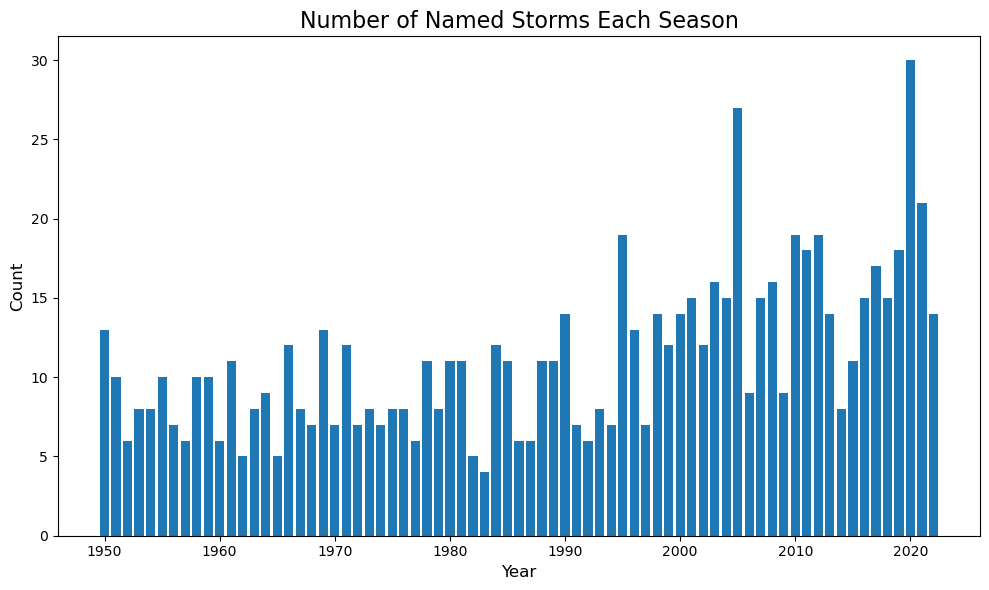

In [4]:
# Count the number of named storms in a season
dfNamedCounts = df[df['NAME'] != 'NOT_NAMED'].groupby(['SEASON']).agg({'NAME':'nunique'}).reset_index()

# Initialize the plot
fig,ax = plt.subplots(figsize=(10,6))

# Plot the counts
ax.bar(dfNamedCounts["SEASON"],dfNamedCounts["NAME"])

# Configure the plot
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Number of Named Storms Each Season",fontsize=16)
plt.tight_layout()

# Save the plot
filePath = '../images/named_storm_count.png'
fig.savefig(filePath)

We can also query seasons. Let's see the unique named storms this year.

In [5]:
df[(df['SEASON']==df['SEASON'].max()) & (df['NAME']!='NOT_NAMED')].groupby("NAME").agg({"ISO_TIME":["first","last"]})

ISO_TIME                    
                       first                last
NAME                                            
ALEX     2022-06-02 18:00:00 2022-06-06 18:00:00
BONNIE   2022-06-22 18:00:00 2022-07-09 18:00:00
COLIN    2022-07-01 18:00:00 2022-07-03 06:00:00
DANIELLE 2022-08-31 12:00:00 2022-09-15 18:00:00
EARL     2022-09-02 18:00:00 2022-09-15 12:00:00
FIONA    2022-09-14 06:00:00 2022-09-27 18:00:00
GASTON   2022-09-19 12:00:00 2022-09-27 18:00:00
HERMINE  2022-09-23 06:00:00 2022-09-26 00:00:00
IAN      2022-09-22 18:00:00 2022-10-02 00:00:00
JULIA    2022-10-02 00:00:00 2022-10-10 18:00:00
KARL     2022-10-11 12:00:00 2022-10-15 18:00:00
LISA     2022-10-30 18:00:00 2022-11-05 12:00:00
MARTIN   2022-10-30 18:00:00 2022-11-04 18:00:00
NICOLE   2022-11-06 12:00:00 2022-11-11 18:00:00

## Accumulated Cyclone Energy

Let's explore the data a bit more. Accumulated Cyclone Energy (ACE) is defined as the cummulative kinetic energy over the storm for every six hours when the winds are above 35 knots. As these numbers are often quite large, they are scaled down by a factor of 10000. Let's subset the whole IBTrACS to six-hourly data which winds below this threshold. It's a little more nuanced than what I'm doing here, but it's still roughly the same idea.

In [6]:
df = df[df['ISO_TIME'].dt.hour.isin([0,6,12,18])]
df["WMO_WIND"] = pd.to_numeric(df[df['WMO_WIND']!=" "]["WMO_WIND"])
df = df[df["WMO_WIND"]>=35]

Now let's subset the data and calculate the ACE based on the formula.

In [7]:
years = [i for i in range(df['SEASON'].min(),df['SEASON'].max()+1)]
ace = [(df[df["SEASON"]==year]['WMO_WIND']**2).sum()/10000. for year in years]

And now we can plot the results.

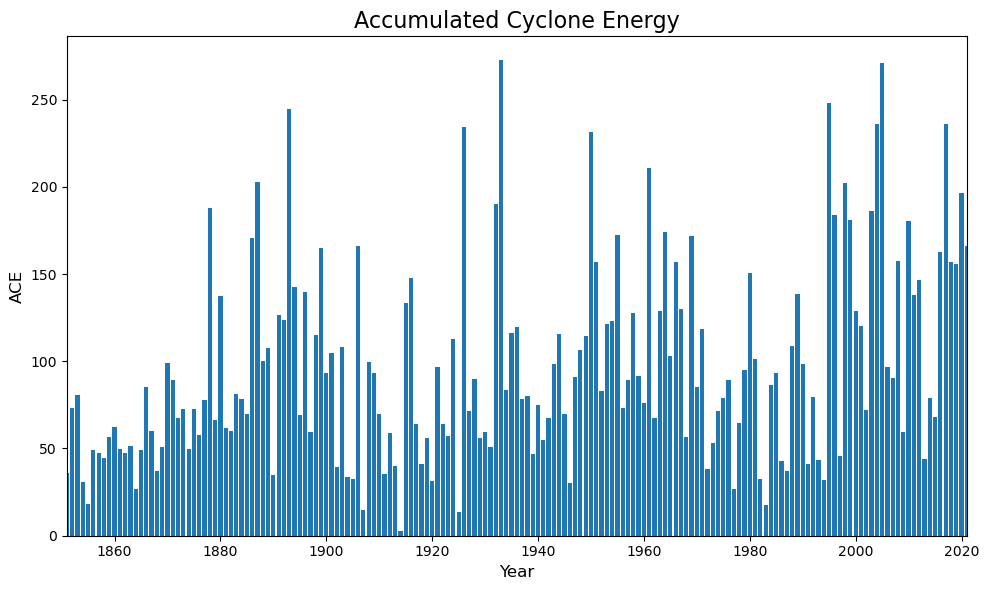

In [8]:
# Plot the ACE data
fig,ax = plt.subplots(figsize=(10,6));
ax.bar(years,ace);
ax.set_xlabel("Year",fontsize=12);
ax.set_ylabel("ACE",fontsize=12);
ax.set_title("Accumulated Cyclone Energy",fontsize=16);
ax.set_xlim(min(years),max(years));
plt.tight_layout()

# Save the plot
filePath = '../images/ace.png'
fig.savefig(filePath)

Let's have a look at the years with the largest ACE.

In [9]:
aceSorted = sorted(ace,reverse=True)
yearsSorted = [year for _,year in sorted(zip(ace,years),reverse=True)]
for aceValue,year in zip(aceSorted[:10],yearsSorted[:10]):
    print("Year",year,"\t Ace:",aceValue)

Year 1933 	 Ace: 272.635
Year 2005 	 Ace: 271.1
Year 1995 	 Ace: 248.14
Year 1893 	 Ace: 244.5925
Year 2004 	 Ace: 235.9775
Year 2017 	 Ace: 235.735
Year 1926 	 Ace: 234.5325
Year 1950 	 Ace: 231.21
Year 1961 	 Ace: 210.8725
Year 1887 	 Ace: 202.505
